## Business Context

In clinical laboratory workflows, automated test systems are used to process large volumes of samples.
The most critical failure in this setting is a false negative — a high-risk test result that is not flagged for manual review.

The goal of this project is to build a decision-support model that flags test results for manual review,
prioritizing recall to minimize false negatives, even if this increases manual review workload.

This model does not replace clinicians.
It supports prioritization so that high-risk cases receive human attention.


## Data and Target Definition

Each row in the dataset represents a diagnostic test derived from image-based measurements of cell nuclei.

The dataset contains multiple numeric features describing shape, texture, and structural characteristics.

Target variable:
- flag_for_review = 1 → requires manual clinical review
- flag_for_review = 0 → does not require review

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()

# Create DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='flag_for_review')

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,flag_for_review
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,flag_for_review
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
# Class Distribution
# We ask the question, how many safe cases vs dangerous cases do we have

df['flag_for_review'].value_counts()

flag_for_review
1    357
0    212
Name: count, dtype: int64

In [6]:
df['flag_for_review'].value_counts(normalize=True)

flag_for_review
1    0.627417
0    0.372583
Name: proportion, dtype: float64

## Model Stability — Cross Validation

To verify that the model’s performance is not dependent on a single train-test split,
5-fold cross-validation is used.

Recall is measured across folds to assess stability.
Consistently high recall with low variance indicates that the model generalizes reliably
and does not rely on favorable data splits.

In [8]:
# Now that we have confirmed class imbalance, we then split our dataset for training and testing

from sklearn.model_selection import train_test_split

X = df.drop(columns='flag_for_review')
y = df['flag_for_review']

# ===============================
# Cross-Validation (Stability Check)
# ===============================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

recall_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring='recall'
)

print("Recall per fold:", recall_scores)
print("Mean recall:", recall_scores.mean())
print("Recall std:", recall_scores.std())



X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Recall per fold: [0.95774648 0.98591549 0.98611111 0.97222222 1.        ]
Mean recall: 0.980399061032864
Recall std: 0.01433356562133385


In [9]:
# We fit scaler on training features only

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# We fit on training data

X_train_scaled = scaler.fit_transform(X_train)

In [10]:
# We transform test data using the scaler

X_test_scaled = scaler.transform(X_test)

## Modeling Approach

This problem is framed as a binary classification task.

Logistic Regression is used as a baseline model due to its interpretability and suitability for clinical decision support.

Because features operate on different numeric scales, feature scaling is applied.
Class imbalance is addressed using class_weight='balanced'.

Model performance is evaluated primarily using recall on the positive class,
since missing a high-risk case is more dangerous than flagging a safe one.

In [12]:
# We train the model on scaled data

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [13]:
# We evaluate properly
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  1]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [14]:
# The model already outputs probabilities, we were just throwing it away. Now we get probabilities instead of hard labels

y_proba = model.predict_proba(X_test_scaled)[:, 1]

## Threshold Tuning

By default, Logistic Regression uses a probability threshold of 0.5 to assign class labels.

In this context, a 0.5 threshold may miss high-risk cases with moderately high predicted probabilities.
To reduce false negatives, the decision threshold is lowered to 0.3.

This adjustment intentionally increases sensitivity to high-risk cases
while accepting an increase in manual review workload.

In [16]:
# We try a lower threshold
import numpy as np

threshold = 0.3
y_pred_03 = (y_proba >= threshold).astype(int)

In [17]:
# We evaluate again
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))

[[41  1]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Results Interpretation

Lowering the decision threshold reduces false negatives to zero in the test set.

This demonstrates a clear trade-off:
- Recall increases for high-risk cases
- Precision decreases slightly due to more cases being flagged

In a clinical context, this trade-off is acceptable,
as patient safety is prioritized over operational convenience.

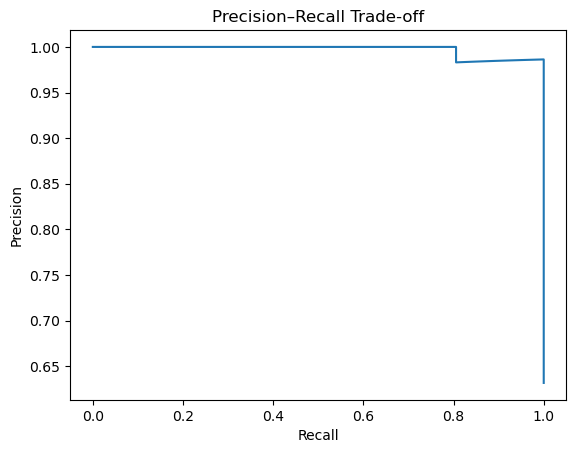

In [19]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Trade-off")
plt.show()

## Conclusion

The final model prioritizes recall to minimize false negatives in clinical risk flagging.

Rather than automating decisions, the model supports clinicians
by ensuring high-risk cases are consistently flagged for review.

This approach aligns with real-world clinical safety and operational constraints.